# Hunter Nixon Smith

## Research question/interests
**What effects can we visualize from the transition of in-person to online/hybrid then back to inperson/hybrid courses during the COVID-19 pandemic impact the grade distribution of individual courses?**

Briefly describe your research question or interests here.
For this project my reasearch will focus on how grade distribution, mean grades and analyze how number students in a class changed from a pre covid era to a shift to online and hybrid classes and then into 2021 with a blend of hybrid, online, and in person courses. I am interested in understanding what the shift from  remote and hybrid learning has affected the academic performance of students in a varitety subjects. After completion of the project, my research aims to provide possible insights into the challenges and benefits that remote and hybrid learning, can have on individuals and insructors. 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from my_code import project_functions1

file_path = ('../data/raw/rawdata.csv')

df = project_functions1.load_and_process(file_path, ['Professor', 'Title', 'Detail'])
df

Year Campus Subject Course   Avg        Median        Percentile (25)  \
                                   mean median   mean median            mean   
0    2018.0   UBCO    ECON  101.0  66.0   66.0   18.0   18.0            99.0   
1    2018.0   UBCO    ECON  102.0  66.0   66.0   15.0   15.0            98.0   
2    2018.0   UBCO    ECON  204.0  65.0   65.0   18.0   19.0           100.0   
3    2018.0   UBCO    ECON  205.0  58.0   58.0   18.0   18.0            96.0   
4    2018.0   UBCO    ECON  221.0  71.0   71.0   18.0   18.0           100.0   
..      ...    ...     ...    ...   ...    ...    ...    ...             ...   
965  2021.0   UBCV    POLI  449.0  80.0   80.0   15.0   15.0            94.0   
966  2021.0   UBCV    POLI  460.0  85.0   85.0    4.0    4.0            90.0   
967  2021.0   UBCV    POLI  462.0  80.0   80.0   11.0   11.0            87.0   
968  2021.0   UBCV    POLI  464.0  84.0   85.0    6.0    5.0            90.0   
969  2021.0   UBCV    POLI  492.0  86.0   86.0    6.0    6.0            92.0   

           Percentile (75)         
    median            mean median  
0     99.0             0.0    0.0  
1    100.0             4.0    0.0  
2    100.0            16.0   12.0  
3     98.0             6.0    5.0  
4    100.0            42.0   42.0  
..     ...             ...    ...  
965   94.0            48.0   48.0  
966   90.0            76.0   76.0  
967   87.0            40.0   40.0  
968   90.0            65.0   72.0  
969   92.0            76.0   76.0  

[970 rows x 12 columns]

Text(0.5, -0.1, 'Total average grade over the past 4 years in all political science, philosophy, and economic courses.\nThis boxplot shows the mean and the upper and lower quartile and then the outliers.')

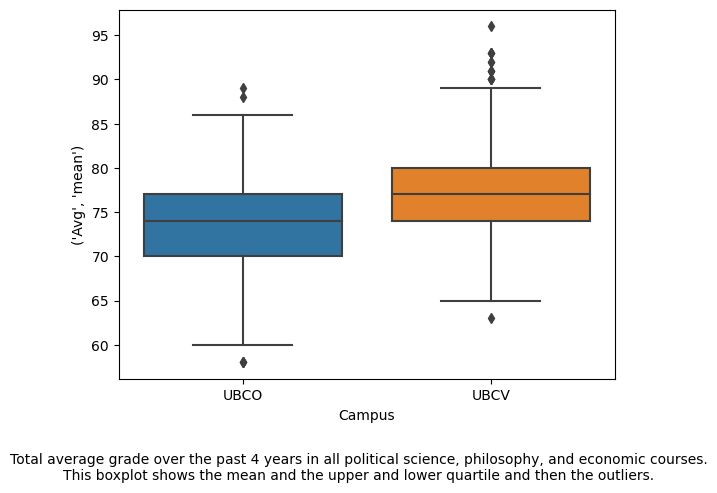

In [ ]:
Total_Grade_Average = sns.boxplot(x="Campus", y=("Avg", "mean"), data=df)
#description for graph
plt.figtext(0.5, -0.1, "Total average grade over the past 4 years in all political science, philosophy, and economic courses.\nThis boxplot shows the mean and the upper and lower quartile and then the outliers.", ha="center", fontsize=10)


Text(0.05, -0.1, 'This boxplot Shows the average by campus and shows the change in average from each year.')

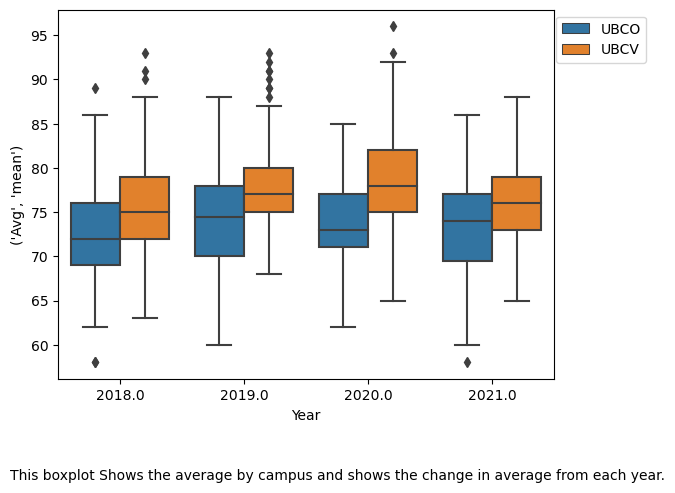

In [ ]:
Total_Average_By_Year = sns.boxplot(x="Year", y=("Avg", "mean"), hue= 'Campus', data=df)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
#description for graph
plt.figtext(0.05,-0.1, "This boxplot Shows the average by campus and shows the change in average from each year.") 



Text(0.2, -0.04, 'This lineplot shows the average of political science, philosophy, and economic courses.\n It then splits each course by campus and creates a line graph for each of the courses.')

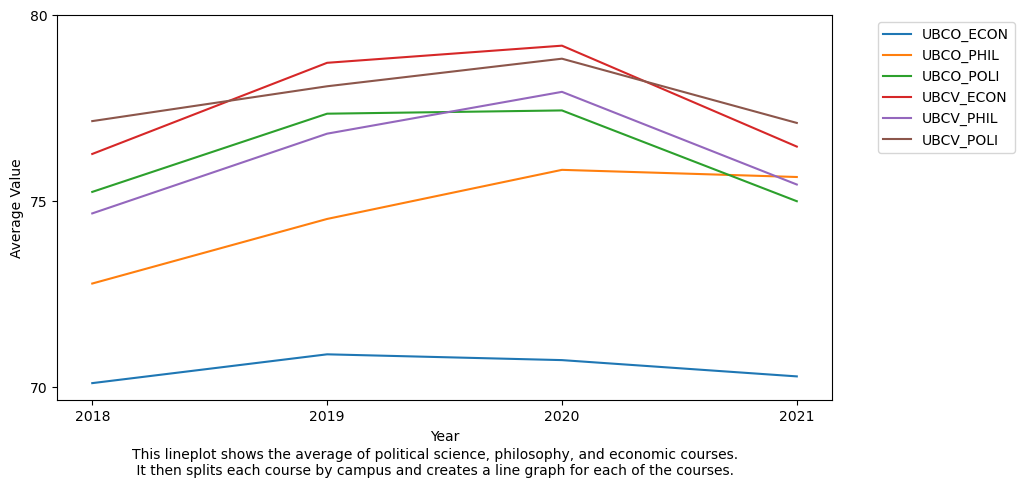

In [ ]:
# set the figure size
plt.figure(figsize=(10, 5))
#set colour
colours = {'UBCO_ECON': '#1f77b4',
          'UBCO_PHIL': '#ff7f0e',
          'UBCO_POLI': '#2ca02c',
          'UBCV_ECON': '#d62728',
          'UBCV_PHIL': '#9467bd',
          'UBCV_POLI': '#8c564b'}

# filter the data
types = ['ECON', 'PHIL', 'POLI']
data = df[df['Subject'].isin(types)]

# add a new column to the data for campus + subject
data['Campus_Subject'] = data['Campus'] + '_' + data['Subject']

# plot the lines
sns.lineplot(x='Year', y=("Avg", "mean"), hue='Campus_Subject', data=data, palette=colours, err_style=None)

# set the y-axis ticks and label
plt.yticks([70, 75, 80])
plt.ylabel('Average Value')

# set the x-axis ticks
plt.xticks([2018, 2019, 2020, 2021])

# add the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# description
plt.figtext(0.2, -0.04, "This lineplot shows the average of political science, philosophy, and economic courses.\n It then splits each course by campus and creates a line graph for each of the courses.")

In [ ]:
file_path = '../data/raw/rawdata.csv'
df = pd.read_csv(file_path)


In [ ]:
columns_to_drop = ['Professor', 'Title', 'Detail']
df = df.drop(columns=columns_to_drop)


In [ ]:
new_file_path = '../data/processed/processeddata.csv'
df.to_csv(new_file_path, index=False)

Text(0.2, -0.04, 'Shows outliars amount of outliars in each subject by campus')

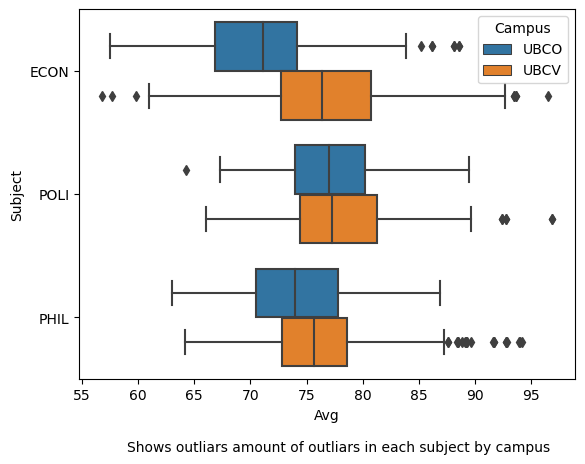

In [ ]:
sns.boxplot(data=df, x='Avg', y='Subject', hue='Campus')
# Description
plt.figtext(0.2, -0.04, "Shows outliars amount of outliars in each subject by campus")

In [ ]:
def load_and_process(file_path, columns_to_drop):
    df = pd.read_csv(file_path) 
    processed_data = (
        df
        .query('Year >= 2018 & Year <= 2021')  # Filter data for years 2018-2021
        .drop(columns=columns_to_drop)  # Drop unnecessary columns
        .groupby(['Year', 'Campus', 'Subject', 'Course'])  # Group data by year, campus, subject, and course
        .agg({
            'Avg': ['mean', 'median'],  # Calculate the mean and median of the average grades
            'Median': ['mean', 'median'],  # Calculate the mean and median of the median grades
            'Percentile (25)': ['mean', 'median'],  # Calculate the mean and median of the 25th percentile
            'Percentile (75)': ['mean', 'median'],  # Calculate the mean and median of the 75th percentile
        })
        .round(0)  # Round the summary statistics to the nearest whole number
        .sort_values(by=['Year', 'Campus', 'Subject', 'Course'])  # Sort the DataFrame by year, campus, subject, and course
        .reset_index()  # Reset the index
        .fillna(0)  # Replace NaN values with 0
    )
    return processed_data


In [ ]:
file_path = '../data/raw/rawdata.csv'
columns_to_drop = ['Professor', 'Title', 'Detail']
df = load_and_process(file_path, columns_to_drop)

load_and_process

<function __main__.load_and_process(file_path, columns_to_drop)>